In [1]:
#Importing required libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Importing csv file
column_name= ["A", "B", "C"]
df= pd.read_csv("Adops & Data Scientist Sample Data - Q2 Regression.csv", names=column_name, header=None)
df.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


Here, we can see that one valriable will dominate others, therefore, to avoid this we normalize the data in further steps.

In [3]:
#Getting basic statistics of the data
df.describe()

,A,B,C
count,300.000000,300.000000,300.000000
mean,2.317009,2.013115,-41.564919
std,5.695248,2.998680,581.251021
min,-8.860000,-2.890000,-10000.000000
25%,-1.940000,-0.606250,-23.375000
50%,0.468500,1.935000,-3.090000
75%,7.042500,4.697500,16.300000
max,20.600000,7.000000,202.000000


In [4]:
#Normalizing the data using mean normalization
df = (df - df.mean())/df.std()
df.head()

,A,B,C
0,-0.320795,-0.731360,0.091294
1,-0.654407,-1.081514,0.091810
2,-0.241255,0.832661,0.065935
3,0.220006,1.019410,0.030391
4,-0.705326,1.633013,0.033488


y= b0 + b1\*x1 + b2\*x2, We need to estimate the b0, b1, b2 coefficients in this regression equation.

In [5]:
#Separating X and y i.e. dependant and independant variables
X = df.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

#.values converts it from DataFrame to numpy array
y = df.iloc[:,2:3].values 
theta = np.zeros([1,3])

#Hyper Parameters for Gradient Descent Function
alpha = 0.01
iters = 1000

In [6]:
#Cost Function
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [7]:
#Gradient Descent function
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

In [8]:
#Calling the functions
g,cost = gradientDescent(X,y,theta,iters,alpha)
print("Coeffients(b0,b1,b2):", g)

finalCost = computeCost(X,y,g)
print("Cost is:",finalCost)

Coeffients(b0,b1,b2): [[-2.05761334e-17 -7.90308664e-02 -9.15937637e-03]]
Cost is: 0.4953167802091263


    We can use above coefficients to predict the y_hat values and calcualte the R-Squared score.

Text(0.5, 1.0, 'Cost vs. Iterations')

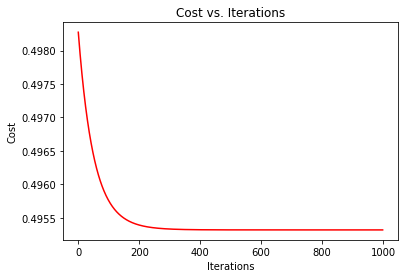

In [9]:
#Plot for cost value
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Cost vs. Iterations')  